In [2]:
import pandas as  pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import numpy as np
import seaborn as sns

# Exploratory Analysis

In [3]:
dt_path = 'C:/Users/Vasiliy Poteriaev/Documents/GitHub/processed data/auto_matrix_2016-04-13.pickle'
dt = pd.read_pickle(dt_path)

In [4]:
dt.head(2)

,Advertising_num_days,CarName,ID,Price_rub,Seller,Seller_location,Views,Car_age,Gear_box,Parsing date,Autocode_checked,Owners_N,Last_owner_time_years,Warranty_end,Engine_capacity,Engine_hp,Engine_fuel_type,Body_type,Swap_type,Original_car_passport,Wheel_drive_type,run_km,Left_steering,is_metallic_color,Color,Opt_Обивка салона: комбинированный,Opt_Цвет салона: темный,Opt_Тонированные стекла,Opt_Ксеноновые фары,Opt_,"Opt_Легкосплавные диски: 17""",Opt_Иммобилайзер,Opt_Штатная,Opt_Бортовой компьютер,Opt_Датчик дождя,Opt_Датчик света,Opt_Круиз-контроль,Opt_Навигационная система,Opt_Обогрев зеркал,Opt_Омыватель фар,Opt_Центральный замок,Opt_Усилитель руля,Opt_Подогрев руля,Opt_Обогрев сидений,Opt_Количество мест: 5,Opt_Климат: климат-контроль 2-зонный,Opt_Электропривод зеркал,Opt_Стеклоподъемники: электро все,Opt_Сиденье водителя: электро,Opt_Сиденье пассажира: электро,Opt_Регулировка руля: электро,Opt_Антиблокировочная система (ABS),Opt_Антипробуксовочная система,Opt_Система курсовой устойчивости,Opt_Подушки безопасности: передние и боковые,Opt_Парктроник,Opt_CD,Opt_TV,Opt_Обивка салона: кожа,Opt_Люк на крыше,"Opt_Легкосплавные диски: 16""",Opt_Обратная связь,Opt_Дистанционный запуск двигателя,Opt_Регулировка руля: в одной плоскости,"Opt_Легкосплавные диски: 18""",Opt_Сиденье водителя: с памятью положения,Opt_Регулировка руля: в двух плоскостях,Opt_Цвет салона: светлый,Opt_Подушки безопасности: водителя и пассажира,"Opt_Легкосплавные диски: 12""",Opt_Климат: климат-контроль 1-зонный,Opt_Стеклоподъемники: электро передние,Opt_Сиденье водителя: ручная,Opt_Сиденье пассажира: ручная,Opt_Обивка салона: велюр,Opt_Кассетник,Opt_Климат: климат-контроль 3-зонный,Opt_Стеклоподъемники: ручные,Opt_Обивка салона: ткань,Opt_Сиденье пассажира: с памятью положения,Opt_Количество мест: 2,"Opt_Легкосплавные диски: 15""",Opt_Количество мест: 4,"Opt_Легкосплавные диски: 19""",Opt_Сиденье пассажира: ручная по высоте,Opt_Сиденье водителя: ручная по высоте,Opt_Количество мест: 7,Opt_Климат: кондиционер,Opt_Газобаллонное оборудование,"Opt_Легкосплавные диски: 20""","Opt_Легкосплавные диски: 14""",Opt_Подушки безопасности: водителя,Opt_Количество мест: 6,"Opt_Легкосплавные диски: 13""","Opt_Легкосплавные диски: 22"""
0,4,Audi A6 III,1034927017,869999,other dealer,"Москва, прочие адреса",9540,6,Автоматическая,2016-04-13,1,2,1.583333,0,3.0,290,бензин,Седан,Не интересует,1,Полный,99000,1,1,Черный,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,Audi A6 II,1035026097,377000,ДЕЛЬТА-АВТО,"Москва, ул. Подвойского, дом 5/19",5454,12,Механическая,2016-04-13,0,1,1.583333,0,2.5,163,дизель,Универсал 5 дв.,Не интересует,1,Передний,75422,1,0,Красный,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


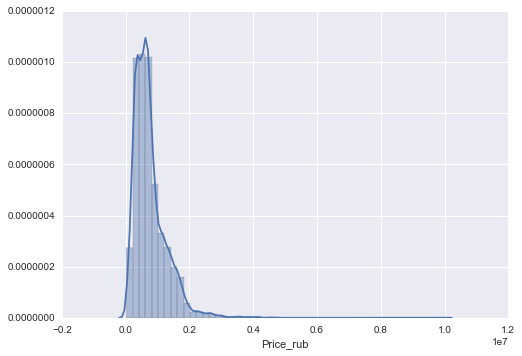

In [5]:
#plot car price distribution
sns.distplot(dt['Price_rub'])

Looks like we have very expensive cars. Max price is higher than 10 mio rub. After exploring such advertisings - such high price is because of bullet proof car body. It does not mentiond in car parameters, such cars has only additional text comment. As we are not interested in buying or selling bulletproof cars such cars would be excluded from future analysis

In [6]:
#remove bulletproof expensive cars
dt = dt[dt['Price_rub'] < 4 * 10 ** 6]

In [7]:
dt.describe()

,Advertising_num_days,ID,Price_rub,Views,Car_age,Autocode_checked,Last_owner_time_years,Warranty_end,Engine_capacity,Engine_hp,Original_car_passport,run_km,Left_steering,is_metallic_color,Opt_Обивка салона: комбинированный,Opt_Цвет салона: темный,Opt_Тонированные стекла,Opt_Ксеноновые фары,Opt_,"Opt_Легкосплавные диски: 17""",Opt_Иммобилайзер,Opt_Штатная,Opt_Бортовой компьютер,Opt_Датчик дождя,Opt_Датчик света,Opt_Круиз-контроль,Opt_Навигационная система,Opt_Обогрев зеркал,Opt_Омыватель фар,Opt_Центральный замок,Opt_Усилитель руля,Opt_Подогрев руля,Opt_Обогрев сидений,Opt_Количество мест: 5,Opt_Климат: климат-контроль 2-зонный,Opt_Электропривод зеркал,Opt_Стеклоподъемники: электро все,Opt_Сиденье водителя: электро,Opt_Сиденье пассажира: электро,Opt_Регулировка руля: электро,Opt_Антиблокировочная система (ABS),Opt_Антипробуксовочная система,Opt_Система курсовой устойчивости,Opt_Подушки безопасности: передние и боковые,Opt_Парктроник,Opt_CD,Opt_TV,Opt_Обивка салона: кожа,Opt_Люк на крыше,"Opt_Легкосплавные диски: 16""",Opt_Обратная связь,Opt_Дистанционный запуск двигателя,Opt_Регулировка руля: в одной плоскости,"Opt_Легкосплавные диски: 18""",Opt_Сиденье водителя: с памятью положения,Opt_Регулировка руля: в двух плоскостях,Opt_Цвет салона: светлый,Opt_Подушки безопасности: водителя и пассажира,"Opt_Легкосплавные диски: 12""",Opt_Климат: климат-контроль 1-зонный,Opt_Стеклоподъемники: электро передние,Opt_Сиденье водителя: ручная,Opt_Сиденье пассажира: ручная,Opt_Обивка салона: велюр,Opt_Кассетник,Opt_Климат: климат-контроль 3-зонный,Opt_Стеклоподъемники: ручные,Opt_Обивка салона: ткань,Opt_Сиденье пассажира: с памятью положения,Opt_Количество мест: 2,"Opt_Легкосплавные диски: 15""",Opt_Количество мест: 4,"Opt_Легкосплавные диски: 19""",Opt_Сиденье пассажира: ручная по высоте,Opt_Сиденье водителя: ручная по высоте,Opt_Количество мест: 7,Opt_Климат: кондиционер,Opt_Газобаллонное оборудование,"Opt_Легкосплавные диски: 20""","Opt_Легкосплавные диски: 14""",Opt_Подушки безопасности: водителя,Opt_Количество мест: 6,"Opt_Легкосплавные диски: 13""","Opt_Легкосплавные диски: 22"""
count,7705.000000,7.705000e+03,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.00000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000
mean,28.778975,1.031632e+09,756479.457625,309622.554705,7.570149,0.099286,1.697188,0.103491,2.355911,180.524234,0.963271,117340.462420,0.995068,0.348864,0.076574,0.698248,0.595068,0.577028,0.215315,0.215055,0.519663,0.633485,0.721220,0.597923,0.611681,0.575860,0.229591,0.767164,0.583907,0.800779,0.799740,0.117456,0.748345,0.235042,0.575990,0.759247,0.756522,0.312654,0.328358,0.091888,0.813887,0.669176,0.636080,0.642700,0.536405,0.770409,0.150032,0.523426,0.158598,0.185464,0.16989,0.086957,0.138222,0.072550,0.207787,0.558728,0.198702,0.150032,0.035302,0.110058,0.058404,0.223621,0.347826,0.069176,0.031149,0.064893,0.065412,0.240493,0.049578,0.111875,0.024789,0.043219,0.014017,0.107073,0.137313,0.000649,0.078520,0.010642,0.001947,0.000779,0.008436,0.000389,0.000130,0.000130
std,55.823362,4.102572e+07,498716.667648,1283299.588625,5.205641,0.299065,0.874227,0.497993,0.4561

suspicious warranty end in 9.7 year from now

In [8]:
dt[dt['Warranty_end'] > 6]

,Advertising_num_days,CarName,ID,Price_rub,Seller,Seller_location,Views,Car_age,Gear_box,Parsing date,Autocode_checked,Owners_N,Last_owner_time_years,Warranty_end,Engine_capacity,Engine_hp,Engine_fuel_type,Body_type,Swap_type,Original_car_passport,Wheel_drive_type,run_km,Left_steering,is_metallic_color,Color,Opt_Обивка салона: комбинированный,Opt_Цвет салона: темный,Opt_Тонированные стекла,Opt_Ксеноновые фары,Opt_,"Opt_Легкосплавные диски: 17""",Opt_Иммобилайзер,Opt_Штатная,Opt_Бортовой компьютер,Opt_Датчик дождя,Opt_Датчик света,Opt_Круиз-контроль,Opt_Навигационная система,Opt_Обогрев зеркал,Opt_Омыватель фар,Opt_Центральный замок,Opt_Усилитель руля,Opt_Подогрев руля,Opt_Обогрев сидений,Opt_Количество мест: 5,Opt_Климат: климат-контроль 2-зонный,Opt_Электропривод зеркал,Opt_Стеклоподъемники: электро все,Opt_Сиденье водителя: электро,Opt_Сиденье пассажира: электро,Opt_Регулировка руля: электро,Opt_Антиблокировочная система (ABS),Opt_Антипробуксовочная система,Opt_Система курсовой устойчивости,Opt_Подушки безопасности: передние и боковые,Opt_Парктроник,Opt_CD,Opt_TV,Opt_Обивка салона: кожа,Opt_Люк на крыше,"Opt_Легкосплавные диски: 16""",Opt_Обратная связь,Opt_Дистанционный запуск двигателя,Opt_Регулировка руля: в одной плоскости,"Opt_Легкосплавные диски: 18""",Opt_Сиденье водителя: с памятью положения,Opt_Регулировка руля: в двух плоскостях,Opt_Цвет салона: светлый,Opt_Подушки безопасности: водителя и пассажира,"Opt_Легкосплавные диски: 12""",Opt_Климат: климат-контроль 1-зонный,Opt_Стеклоподъемники: электро передние,Opt_Сиденье водителя: ручная,Opt_Сиденье пассажира: ручная,Opt_Обивка салона: велюр,Opt_Кассетник,Opt_Климат: климат-контроль 3-зонный,Opt_Стеклоподъемники: ручные,Opt_Обивка салона: ткань,Opt_Сиденье пассажира: с памятью положения,Opt_Количество мест: 2,"Opt_Легкосплавные диски: 15""",Opt_Количество мест: 4,"Opt_Легкосплавные диски: 19""",Opt_Сиденье пассажира: ручная по высоте,Opt_Сиденье водителя: ручная по высоте,Opt_Количество мест: 7,Opt_Климат: кондиционер,Opt_Газобаллонное оборудование,"Opt_Легкосплавные диски: 20""","Opt_Легкосплавные диски: 14""",Opt_Подушки безопасности: водителя,Opt_Количество мест: 6,"Opt_Легкосплавные диски: 13""","Opt_Легкосплавные диски: 22"""
5324,3,Nissan Teana II,1035051403,620000,person,"Москва, прочие адреса",5353,8,Вариатор,2016-04-13,0,2,0.916667,9.71957,2.5,182,бензин,Седан,Не интересует,1,Передний,110745,1,0,Черный,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#obviously warranty end should be 0 for 8 years old  car
dt.loc[dt['Warranty_end'] > 6, 'Warranty_end'] = 0

(0, 200)

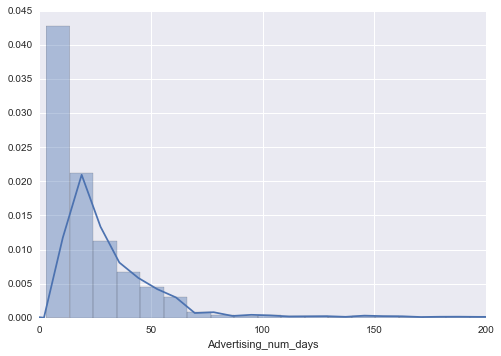

In [10]:
# num. of days
sns.distplot(dt['Advertising_num_days'], bins =100)
plt.xlim(0, 200)

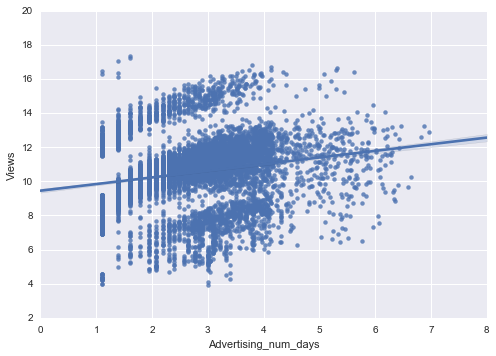

In [11]:
# scatterplot of log(views) vs log(number_of_advertising_days)
# it's clearly have 3 clusters of advertisement

sns.regplot(np.log(dt['Advertising_num_days']),np.log(dt['Views']))

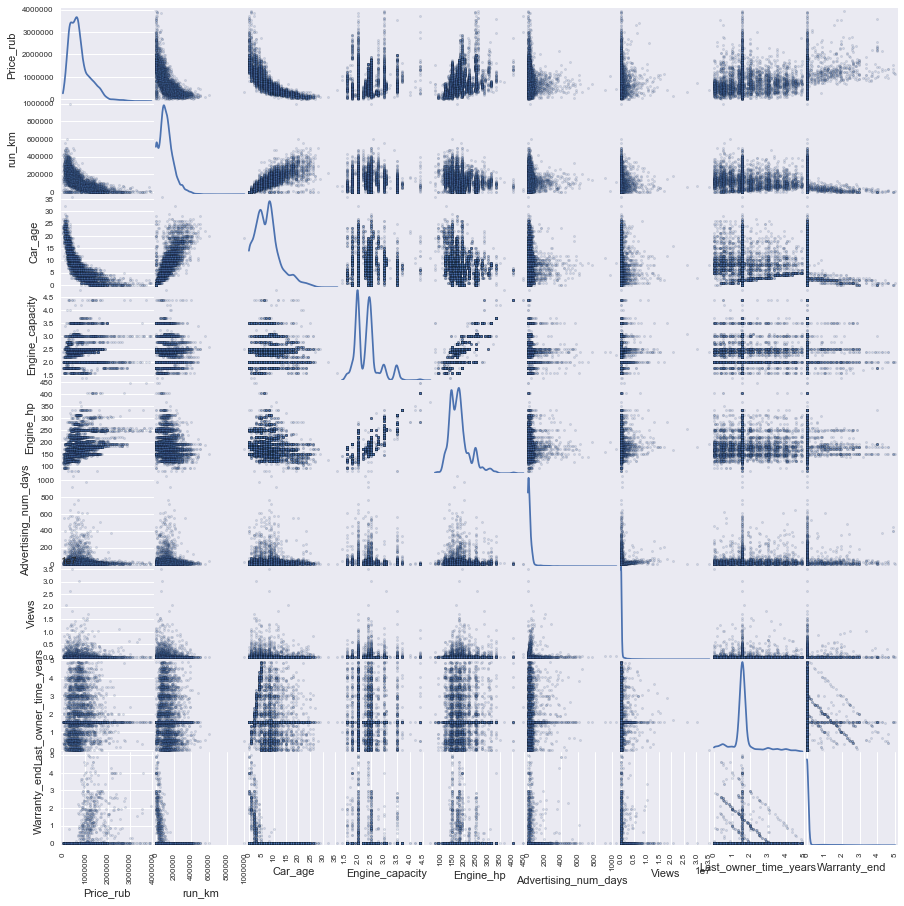

In [12]:
from pandas.tools.plotting import scatter_matrix
sc_matr = scatter_matrix(dt[['Price_rub','run_km','Car_age','Engine_capacity','Engine_hp','Advertising_num_days',
                             'Views','Last_owner_time_years','Warranty_end']], alpha=0.2, figsize=(15, 15), diagonal='kde')

From scatter matrix printed above we can see strong relation of car price from

negative:
1) Car Age (not linear)
2) Car run (not linear)

positive:
1) Engine capacity
2) Engine horse power (strong heteroscedasticity)

positive not strong:
1) Number of advertising days
2) Views
3) Last owner time
4) Time to warranty end

Let's find explore not linear forms of relation. It is common sense that car price decreses on certain percentage every year. So as it becomes older price decreases for smaller ammount of money. So obvious form of relation for price vs age would be log-linear. Same logic applies for car run.

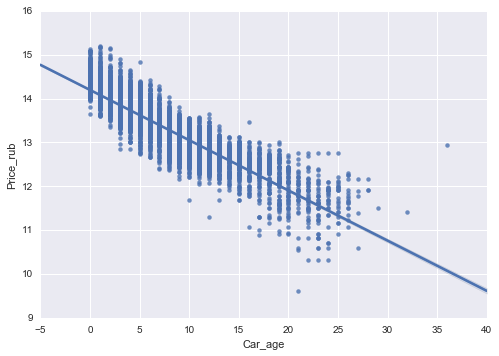

In [13]:
sns.regplot((dt['Car_age']),np.log(dt['Price_rub']))

In [209]:
dt['CarBrand'] = dt.CarName.apply(lambda x: x.split(' ')[0])
dt['Price_th_rub'] = dt['Price_rub']/1000

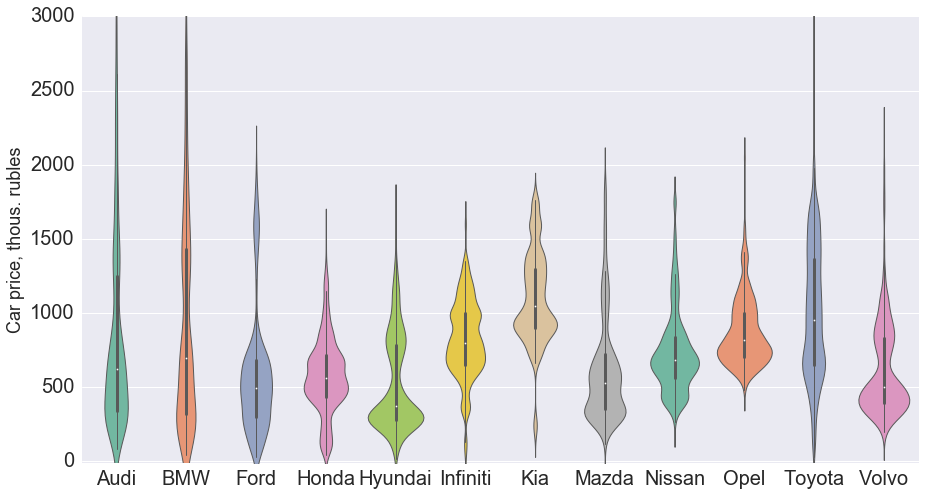

In [224]:
f, ax = plt.subplots(figsize=(15, 8))


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    
ax.set_xlabel('',fontsize =18)
ax.set_ylabel('',fontsize =18)


# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=dt, x = 'CarBrand', y = 'Price_th_rub', palette="Set2", bw=.2, cut=3, linewidth=1)
ax.set(ylim=(-10, 3000),xlabel='', ylabel='Car price, thous. rubles')

sns.despine(left=True, bottom=True)
f.savefig('C:/Users/Vasiliy Poteriaev/Documents/GitHub/Price_violin.png',dpi=300)

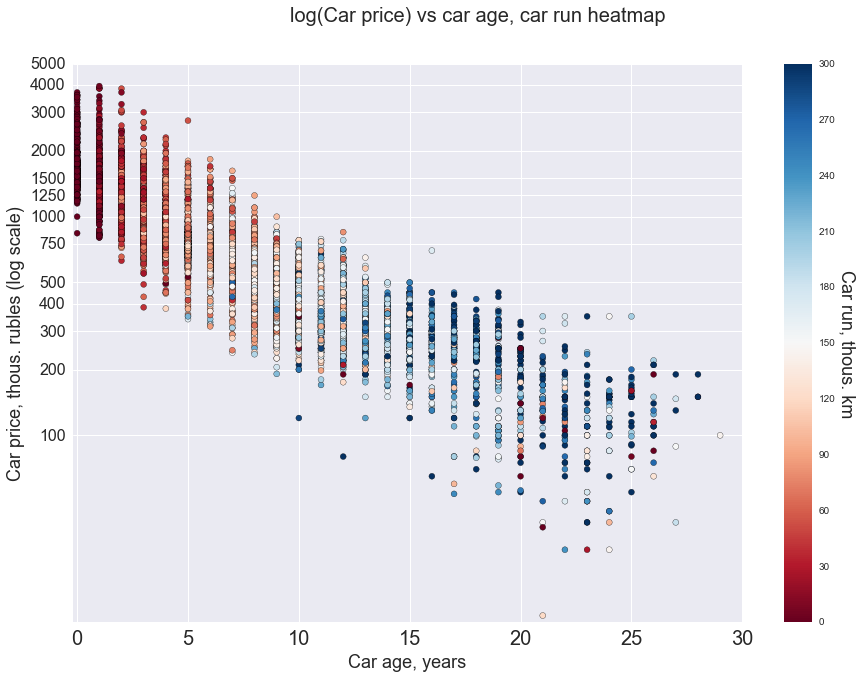

In [170]:
cm = plt.cm.get_cmap('RdBu')

fig = plt.figure(figsize = (15,10))
fig.suptitle('log(Car price) vs car age, car run heatmap', fontsize=20)

ax = fig.add_subplot(111)
ax.set_yscale('log')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

ax.set_xlabel('Car age, years',fontsize =18)
ax.set_ylabel('Car price, thous. rubles (log scale)',fontsize =18)

ax = plt.scatter(dt['Car_age'], (dt['Price_rub']/1000),
                     c=dt["run_km"]/1000, s=35, cmap=cm,vmin=0, vmax=300)

axes = plt.gca()
axes.set_xlim([-0.2,30])
axes.set_ylim([0, 5000])


major_ticks = [100,200,300,400,500,750,1000,1250,1500,2000,3000,4000,5000]
    
axes.yaxis.set_ticks(major_ticks)
axes.set_yticklabels(major_ticks, fontsize=16)

cbar = plt.colorbar(ax)
cbar.set_label("Car run, thous. km", rotation=270, fontsize =18, labelpad=20)
fig.savefig('C:/Users/Vasiliy Poteriaev/Documents/GitHub/Price_vs_Age.png',dpi=300)

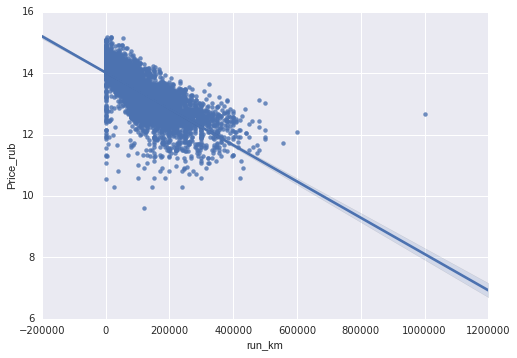

In [80]:
sns.regplot((dt['run_km']),np.log(dt['Price_rub']))

engine capacity doen't have high relation to price and price could vary sharply across given capacity. Let's consider multiplicative relation in order to decrease variance and outliers values. Same for Engine horse power.

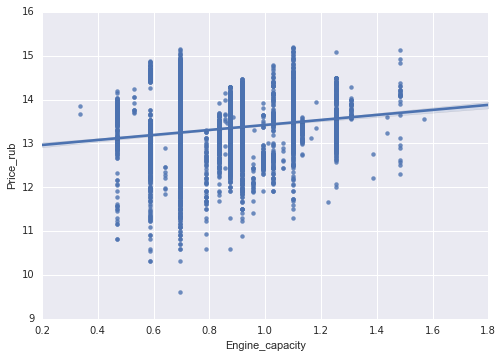

In [84]:
sns.regplot(np.log(dt['Engine_capacity']),np.log(dt['Price_rub']))

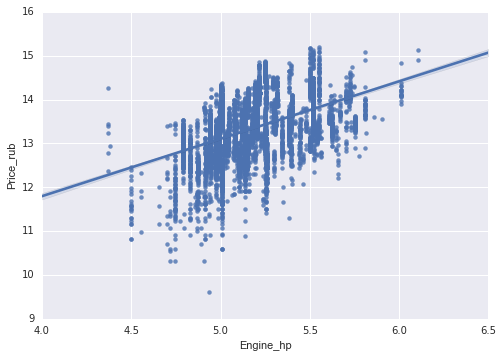

In [88]:
sns.regplot(np.log(dt['Engine_hp']),np.log(dt['Price_rub']))

the chart is not clear whether there are relationship between price vs length of advertisement or number of views. As most of advertisement concentraited  in one area let's check for quadratic form of relation.

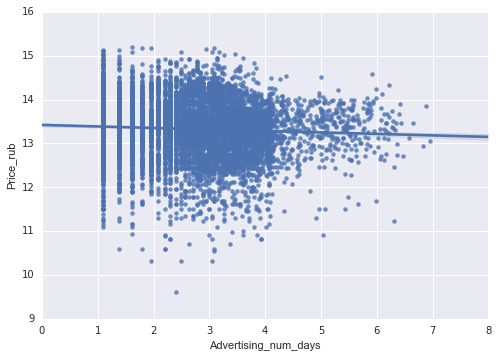

In [100]:
sns.regplot(np.log(dt['Advertising_num_days']) ,np.log(dt['Price_rub']))

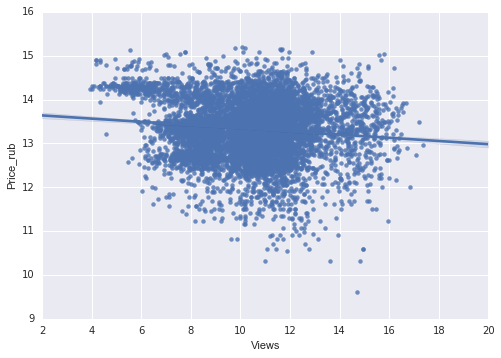

In [105]:
sns.regplot(np.log(dt['Views']) ,np.log(dt['Price_rub']))

Nice positive relation between last owner time and price

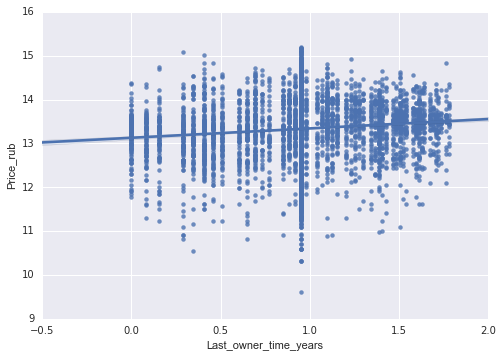

In [111]:
sns.regplot(np.log(dt['Last_owner_time_years']+1) ,np.log(dt['Price_rub']))

Active warranty shoud add some value to price, but dummy variable for no warranty shoud be considered

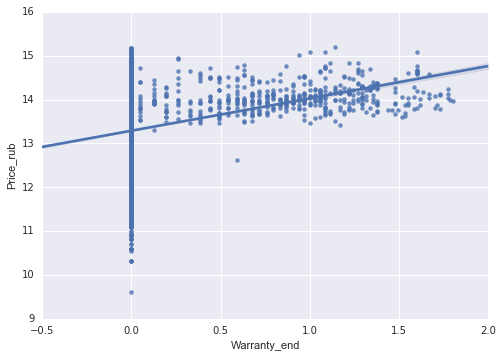

In [114]:
sns.regplot(np.log(dt['Warranty_end']+1) ,np.log(dt['Price_rub']))

# Linear Model

After exploring of basic variables, good start is to build linear moder in order to understand how good or bad we can forecast car price based on few obvious factors. Than it would be useful to compare results of various machine learning techniques with simple linear model forecast.